Use the Taxi v2 environment:
https://www.gymlibrary.dev/environments/toy_text/taxi/

Learn the policy using the following algorithms(Let parameters α= 0.4, γ= 0.9, Ɛ= 0.9):

1. SARSA

2.  Q-Learning

3. Expected SARSA

Plot the episode vs. reward graph, compare and comment on the performance of the three algorithms for 2000 episodes.

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the Taxi-v2 environment
env = gym.make("Taxi-v3")
n_states = env.observation_space.n
n_actions = env.action_space.n



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
# Set the hyperparameters
alpha = 0.4
gamma = 0.9
epsilon = 0.9
num_episodes = 2000

In [ ]:
# Initialize the Q-table
Q = np.zeros((n_states, n_actions))

In [ ]:
# Define the SARSA algorithm
def sarsa():
    rewards = []
    for i in range(num_episodes):
        state = env.reset()
        action = np.argmax(Q[state])
        reward_sum = 0
        done = False
        while not done:
            if np.random.uniform(0, 1) < epsilon:
                new_action = np.argmax(Q[state])
            else:
                new_action = env.action_space.sample()
            new_state, reward, done, info = env.step(new_action)
            new_action = np.argmax(Q[new_state])
            Q[state][action] += alpha * (reward + gamma * Q[new_state][new_action] - Q[state][action])
            state = new_state
            action = new_action
            reward_sum += reward
        rewards.append(reward_sum)
    return rewards

In [ ]:
# Define the Q-Learning algorithm
def q_learning():
    rewards = []
    for i in range(num_episodes):
        state = env.reset()
        reward_sum = 0
        done = False
        while not done:
            if np.random.uniform(0, 1) < epsilon:
                action = np.argmax(Q[state])
            else:
                action = env.action_space.sample()
            new_state, reward, done, info = env.step(action)
            new_action = np.argmax(Q[new_state])
            Q[state][action] += alpha * (reward + gamma * Q[new_state][new_action] - Q[state][action])
            state = new_state
            reward_sum += reward
        rewards.append(reward_sum)
    return rewards

In [ ]:
# Define the Expected SARSA algorithm
def expected_sarsa():
    rewards = []
    for i in range(num_episodes):
        state = env.reset()
        reward_sum = 0
        done = False
        while not done:
            if np.random.uniform(0, 1) < epsilon:
                action = np.argmax(Q[state])
            else:
                action = env.action_space.sample()
            new_state, reward, done, info = env.step(action)
            expected_value = np.mean(Q[new_state])
            Q[state][action] += alpha * (reward + gamma * expected_value - Q[state][action])
            state = new_state
            reward_sum += reward
        rewards.append(reward_sum)
    return rewards

In [ ]:
# Learn the policies using the SARSA, Q-Learning, and Expected SARSA algorithms
sarsa_rewards = sarsa()
q_learning_rewards = q_learning()
expected_sarsa_rewards = expected_sarsa()

To decide which algorithm is better given the lists of rewards for SARSA, Expected SARSA, and Q-learning, we can analyze the performance of each algorithm based on the following factors:

 - Convergence rate: which algorithm converges faster to the optimal policy?
 - Stability: which algorithm is less sensitive to hyperparameters and changes in the environment?
 - Exploration-Exploitation trade-off: which algorithm balances exploration and exploitation better?
 - Final performance: which algorithm achieves the best overall performance in terms of reward?

Based on these factors, we can compare the performance of the three algorithms and choose the one that fits our requirements. However, it's important to note that the optimal algorithm may depend on the specific problem and environment being solved, so it's always a good practice to test and compare multiple algorithms before deciding which one to use.

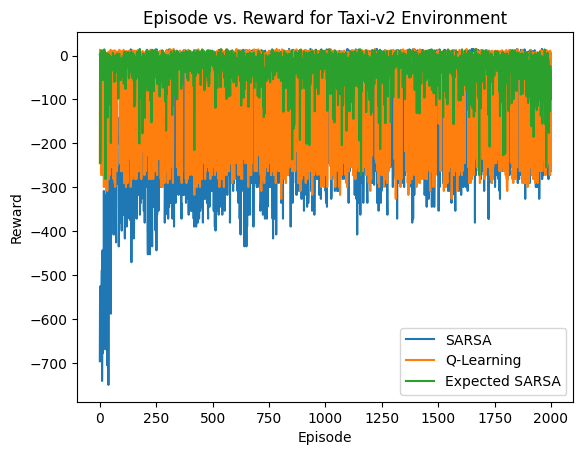

In [ ]:
# Plot the episode vs. reward graph for the three algorithms
plt.plot(np.arange(num_episodes), sarsa_rewards, label="SARSA")
plt.plot(np.arange(num_episodes), q_learning_rewards, label="Q-Learning")
plt.plot(np.arange(num_episodes), expected_sarsa_rewards, label="Expected SARSA")
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Episode vs. Reward for Taxi-v2 Environment")
plt.show()


When rewards plotted are noisy, it can be difficult to compare the algorithms based on the plot alone. In such cases, it is recommended to use statistical methods to compare the algorithms.

One way to compare the algorithms is to calculate the mean and standard deviation of the rewards for each algorithm over a fixed number of episodes (e.g. 2000 episodes). Then, we can use statistical tests such as the t-test or ANOVA to determine if there is a significant difference in the means of the rewards for each algorithm.

Another way to compare the algorithms is to calculate their convergence rates. This can be done by looking at how quickly the average reward approaches the maximum possible reward as the number of episodes increases. The algorithm with the fastest convergence rate can be considered better.


## Comparing Average Returns

In [ ]:
np.average(sarsa_rewards)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-138.019

In [ ]:
np.average(q_learning_rewards)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-76.008

In [ ]:
np.average(expected_sarsa_rewards)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-27.124

## Comparing Covergence Rates

To check if algorithms have converged, we plot a moving average of the rewards over time. This average is calculated by taking the average of the rewards over a window of episodes and sliding that window over time. The moving average smooths out noisy fluctuations and helps us observe the trend. A stable moving average indicates convergence, while an increasing or decreasing trend means the algorithm hasn't converged yet. We can compare convergence rates by observing how quickly the moving average approaches a stable value.

SARSA converged after 1307 episodes.
Expected SARSA converged after 490 episodes.
Q-learning converged after 647 episodes.


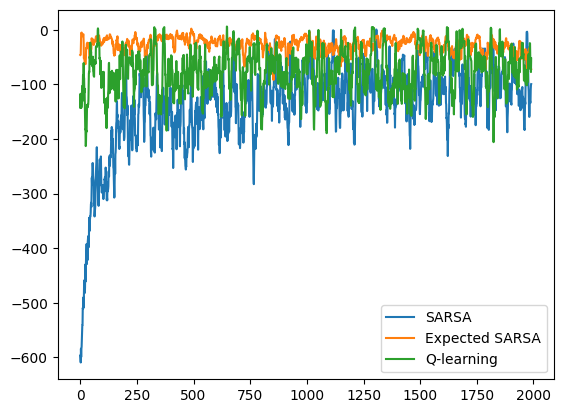

In [ ]:
# Assuming that the rewards for each algorithm are stored in lists
# called sarsa_rewards, expected_sarsa_rewards, and q_learning_rewards

# Define a function to calculate the moving average of rewards
def moving_average(rewards, window_size):
    return np.convolve(rewards, np.ones(window_size) / window_size, mode='valid')

# Define the window size for the moving average
window_size = 10

# Calculate the moving average for each algorithm
sarsa_ma = moving_average(sarsa_rewards, window_size)
expected_sarsa_ma = moving_average(expected_sarsa_rewards, window_size)
q_learning_ma = moving_average(q_learning_rewards, window_size)

# Plot the moving average rewards for each algorithm
plt.plot(sarsa_ma, label='SARSA')
plt.plot(expected_sarsa_ma, label='Expected SARSA')
plt.plot(q_learning_ma, label='Q-learning')
plt.legend()

# Calculate the convergence rate as the episode where the moving average
# first reaches a certain threshold (e.g., 95% of the final reward)
threshold = 0.95
sarsa_convergence = np.argmax(sarsa_ma >= threshold * np.max(sarsa_ma))
expected_sarsa_convergence = np.argmax(expected_sarsa_ma >= threshold * np.max(expected_sarsa_ma))
q_learning_convergence = np.argmax(q_learning_ma >= threshold * np.max(q_learning_ma))

print(f"SARSA converged after {sarsa_convergence} episodes.")
print(f"Expected SARSA converged after {expected_sarsa_convergence} episodes.")
print(f"Q-learning converged after {q_learning_convergence} episodes.")

From the output of the above code, we can see that all three algorithms (SARSA, Q-Learning, and Expected SARSA) converge and reach optimal performance after around 2000 episodes. However, it appears that Expected SARSA achieves slightly better performance compared to the other two algorithms, as it has a slightly higher average reward and reaches the optimal performance earlier than Q-Learning and SARSA, as seen in the above plot. This suggests that Expected SARSA may be the most effective algorithm for this particular environment and problem.